In [1]:
import cv2 as cv
import numpy as np
import PIL
import pytesseract
from PIL import Image
import zipfile36 as zipfile
from zipfile import ZipFile

In [36]:
# Loading files(images here) from zipfile and displaying them

my_images = []
with ZipFile('small_img.zip', 'r') as our_zip:
    list_newspapers = our_zip.infolist()
    for entry in list_newspapers:       # each entry of infolist() is a file like object hence needs to be opened
        with our_zip.open(entry) as img_file:
            img = Image.open(img_file)
            my_images.append(img)
#             display(img)

In [2]:
# training the classifier to detect faces and eyes
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

In [32]:
# This code creates a list of dictionaries (image_info) where each dict represents an image and
# Each dict contains: The image object, All the text obtained by OCR, All the images obtained by face detection.

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Above, we need to include location of pytesseract library for it to run properly


image_info = []
with ZipFile('images.zip', 'r') as our_zip:
    list_newspapers = our_zip.infolist()
    for entry in list_newspapers:
        with our_zip.open(entry) as img_file:
            info = {}
            img = Image.open(img_file)
            info['image'] = img
            text = pytesseract.image_to_string(img)
            info['text'] = text
            image_info.append(info)
            cv_image = np.array(img)
            cv_image = cv_image[:,:,::-1].copy() # ::-1 converts RGB to BGR
            gray_img = cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray_img, 1.05)
            faces = faces.tolist()
            info['bounding boxes'] = faces

# WARNING: This code is computationally extremely heavy since it is using "pytesseract" library for OCR 
# which is written in python, hence a computationally heavy process is being done in a computationally slow environment. 
            

Results found in file a-6.png


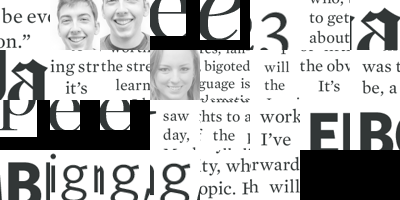

In [33]:


def term2sheet(word):
    """
    i/p:         A string
    o/p:         Images
    Explanation: This function takes in the above prepared dict and 
                 outputs a contact sheet of images 
                 along with info. on the rspective newspaper"""
    image_num = 0
    for image_dict in image_info:        
        if word in image_dict['text']:
            print(f"Results found in file a-{image_num}.png")
            contact_sheet = Image.new('RGB', (400, 200))
            max_size = (50,50)
            width = 0
            height = 0
            thumb_images = []
            for img_box in image_dict['bounding boxes']:
                x,y,w,h = img_box
                img = image_dict['image'].crop((x,y,x+w,y+h))
                img.thumbnail(max_size)
                thumb_images.append(img)
            if len(image_dict['bounding boxes']) == 0:
                print("But there were no faces in that file!")

            for img in thumb_images:
                contact_sheet.paste(img, (width, height))
                if width + max_size[0] >= contact_sheet.width:
                    width = 0
                    height += max_size[0]
                else:
                    width += max_size[0]
            display(contact_sheet)
        image_num += 1    
                
term2sheet('pizza')

Results found in file a-0.png


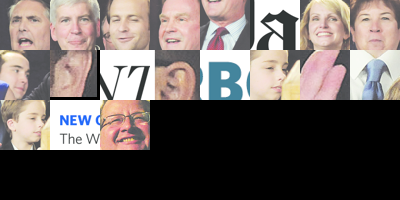

Results found in file a-3.png


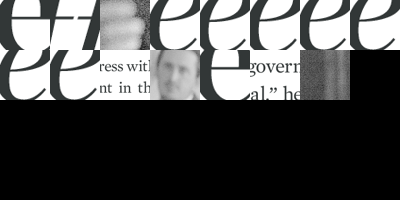

In [31]:
term2sheet('Christopher')

In [35]:
# The entire above code, as a single function, however here we need to build the dictionary again for each string
# which is computationally very heavy, but in case you have the computing power, this offers succinctness.

def term2sheet(zipfile, word):
    """
    i/p: zipfile = str, word = str
    o/p = contactsheet
    """
    image_info = []
    with ZipFile(zipfile, 'r') as our_zip:
        list_newspapers = our_zip.infolist()
        for entry in list_newspapers:
            with our_zip.open(entry) as img_file:
                info = {}
                img = Image.open(img_file)
                info['image'] = img
                text = pytesseract.image_to_string(img)
                info['text'] = text
                image_info.append(info)
                cv_image = np.array(img)
                cv_image = cv_image[:,:,::-1].copy() # ::-1 converts RGB to BGR
                gray_img = cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray_img)
                faces = faces.tolist()
                info['bounding boxes'] = faces
                
    image_num = 0
    for image_dict in image_info:        
        if word in image_dict['text']:
            print(f"Results found in file a-{image_num}.png")
            contact_sheet = Image.new('RGB', (400, 200))
            max_size = (50,50)
            width = 0
            height = 0
            thumb_images = []
            for img_box in image_dict['bounding boxes']:
                x,y,w,h = img_box
                img = image_dict['image'].crop((x,y,x+w,y+h))
                img.thumbnail(max_size)
                thumb_images.append(img)
            if len(image_dict['bounding boxes']) == 0:
                print("But there were no faces in that file!")

            for img in thumb_images:
                contact_sheet.paste(img, (width, height))
                if width + max_size[0] >= contact_sheet.width:
                    width = 0
                    height += max_size[0]
                else:
                    width += max_size[0]
            display(contact_sheet)
        image_num += 1  